# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de fotocasa, el cual es uno de los sitios mas populares de bienes raíces en España. Por favor no hagas estos (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa mas cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

Let's start with precisely that question... Good luck!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

#### Ejercicio 01. ¿Cuál es la casa mas cara en el todo el dataset? (★☆☆)

Imprime la direccion y el precio de la casa seleccionada. Por ejemplo:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [ ]:

import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
result = ds.loc[ds["price"].idxmax()]
print(f"The house with address {result['address']} is the most expensive with the price {result['price']}")

'The house with address El Escorial is the most expensive with the price 8500000'

#### Ejercicio 02. ¿Cuál es la casa mas barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
result = ds.loc[ds["price"].idxmin()]
print(f"The house with address {result['address']} is the cheapest with the price {result['price']}")

The house with address Parla is the cheapest with the price 0


#### Ejercicio 03. ¿Cuál es la casa mas grande y la mas pequeña del dataset? (★☆☆)

Imprime la dirección y el area de las casas seleccionadas. Por ejemplo:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
result_max = ds.loc[ds["surface"].idxmax()]
result_min = ds.loc[ds['surface'].idxmin()]
print(f"The bigger house is located on {result_max['address']} and its surface is {result_max['surface']} meters")
print(f"The smaller house is located on {result_min['address']} and its surface is {result_min['surface']} meters")

The bigger house is located on Sevilla la Nueva and its surface is 249000.0 meters
The smaller house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3,...`

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
count_population = ds.level5.unique()
", ".join(str(x) for x in count_population)
print(", ".join(str(x) for x in count_population))

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Ejercicio 05. ¿El data set contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`true` o `fase`) seguido de la fila/columna que contiene el NAs.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# recuerda la funcion pd.isna retorna se un valor es NaN (true or false)
for index, row in ds.iterrows():
    for column_index, column_value in row.items():
        print(f'{pd.isna(column_value)} {index}/{column_index}')

False 0/Unnamed: 0
False 0/id_realEstates
False 0/isNew
False 0/realEstate_name
False 0/phone_realEstate
False 0/url_inmueble
False 0/rooms
False 0/bathrooms
False 0/surface
False 0/price
False 0/date
False 0/description
False 0/address
False 0/country
False 0/level1
False 0/level2
False 0/level3
False 0/level4
False 0/level5
True 0/level6
False 0/level7
True 0/level8
False 0/upperLevel
False 0/countryId
False 0/level1Id
False 0/level2Id
False 0/level3Id
False 0/level4Id
False 0/level5Id
False 0/level6Id
False 0/level7Id
False 0/level8Id
False 0/accuracy
False 0/latitude
False 0/longitude
True 0/zipCode
True 0/customZone
False 1/Unnamed: 0
False 1/id_realEstates
False 1/isNew
False 1/realEstate_name
False 1/phone_realEstate
False 1/url_inmueble
False 1/rooms
False 1/bathrooms
True 1/surface
False 1/price
False 1/date
False 1/description
False 1/address
False 1/country
False 1/level1
False 1/level2
False 1/level3
False 1/level4
False 1/level5
True 1/level6
False 1/level7
True 1/level8
F

#### Ejercicio 06. Elimina los NAs del data set, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [2]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds.dropna(inplace=False)
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido

In [ ]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds_level5 = ds[ds['level5'] == "Arroyomolinos (Madrid)"]
mean_price = ds_level5['price'].mean()
print(f"La media para la población Arroyomolinos es: {mean_price}")


La media para la población Arroyomolinos es: 294541.59854014596


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


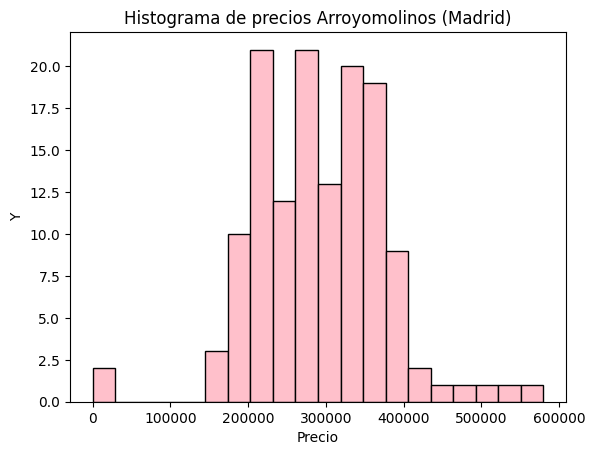

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds_level5 = ds[ds['level5'] == "Arroyomolinos (Madrid)"]
mean_price = ds_level5['price'].mean()


plt.hist(ds_level5['price'], bins=20, color='pink', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Y')
plt.title('Histograma de precios Arroyomolinos (Madrid)')

plt.show()

#### Ejercicio 09. ¿ Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedio y escribe una conclusion acerca de ellos

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds_valdemorillo = ds[ds['level5'] == "Valdemorillo"]
mean_valdemorillo = ds_valdemorillo['price'].mean()
ds_galapagar = ds[ds['level5'] == "Galapagar"]
mean_galapagar = ds_galapagar['price'].mean()
print(f"El precio promedio de Valdemorillo es {mean_valdemorillo} y para Galapagar {mean_galapagar}")

#Poseen una diferencia de precios del 1.043%, siendo 


El precio promedio de Valdemorillo es 363860.2931034483 y para Galapagar 360063.20238095237


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (price/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio y escribe una conclusion acerca de ellos.

Pista: Crea una nueva columna llamada `pps` (price per square) y luego analiza los valore.s

In [ ]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds['pps'] = ds['price'] / ds['surface']

valdemorillo_pps_avg = ds[ds['level5'] == 'Valdemorillo']['pps'].mean()
galapagar_pps_avg = ds[ds['level5'] == 'Galapagar']['pps'].mean()
print(f"El promedio de Valdemorrillo es: {valdemorillo_pps_avg} €/m2")
print(f"El primedio para Galapagar es; {galapagar_pps_avg} €/m2")

if valdemorillo_pps_avg == galapagar_pps_avg:
    print("En conclusión los promedios de precio por metro cuadrado son iguales para Valdemorillo y Galapagar.")
else:
    print("En conclusión los promedios de precio por metro cuadrado son diferentes para Valdemorillo y Galapagar siendo una más costosa que la otra")

El promedio de Valdemorrillo es: 1317.9502109024986 €/m2
El primedio para Galapagar es; 1606.3240303094024 €/m2
En conclusión los promedios de precio por metro cuadrado son diferentes para Valdemorillo y Galapagar siendo una más costosa que la otra


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusion al respecto.

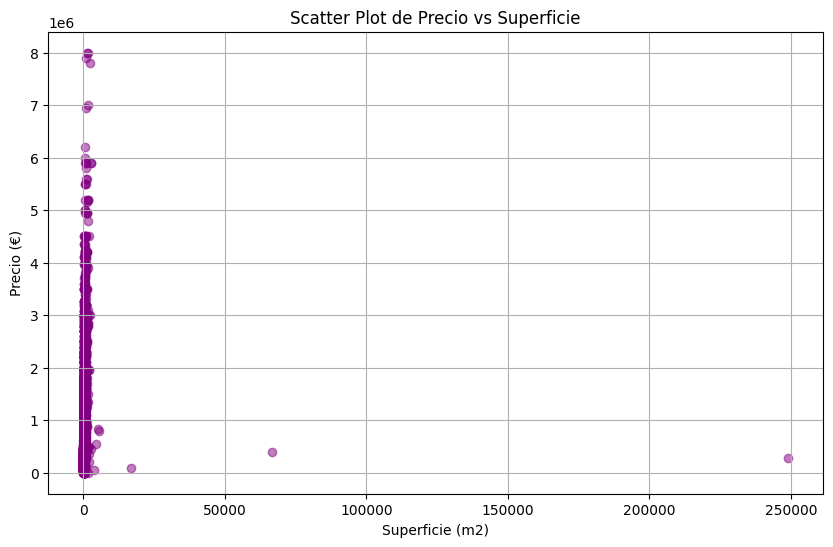

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
ds = pd.read_csv('assets/real_estate.csv', sep=';')

plt.figure(figsize=(10, 6))
plt.scatter(ds['surface'], ds['price'], color='purple', alpha=0.5)
plt.title('Scatter Plot de Precio vs Superficie')
plt.xlabel('Superficie (m2)')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

**TODO: Markdown**. Escribe aquí, haz doble click en este celda y elimina este contenido y reemplázalo por el texto que quires escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
num_agencias = ds['realEstate_name'].nunique()
print("Número de agencias en el DataSet es:", num_agencias)

Número de agencias en el DataSet es: 1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [ ]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')

casas_por_poblacion = ds['level5'].value_counts()
poblacion_mayor_casas = casas_por_poblacion.idxmax()
cantidad_casas_max = casas_por_poblacion.max()

print("La población con la mayor cantidad de casas es:", poblacion_mayor_casas)
print("Número de casas en esta población:", cantidad_casas_max)


La población con la mayor cantidad de casas es:  Madrid Capital
Número de casas en esta población: 6643


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Has un subconjunto del Dataframe original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Pista: Filtra el Dataframe original usando la columna `level5` y la función `isin`

In [ ]:
import pandas as pd



ds = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones = ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])
ds_sur = ds[poblaciones]
print(ds_sur)



       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barra de la media de los precios y explica lo que observas (debes usar el subconjunto obtenido de la pregunta 14) (★★★)

Imprima un gráfico de barra de la media de precios y escriba en la celda Markdown un breve análisis del sector.

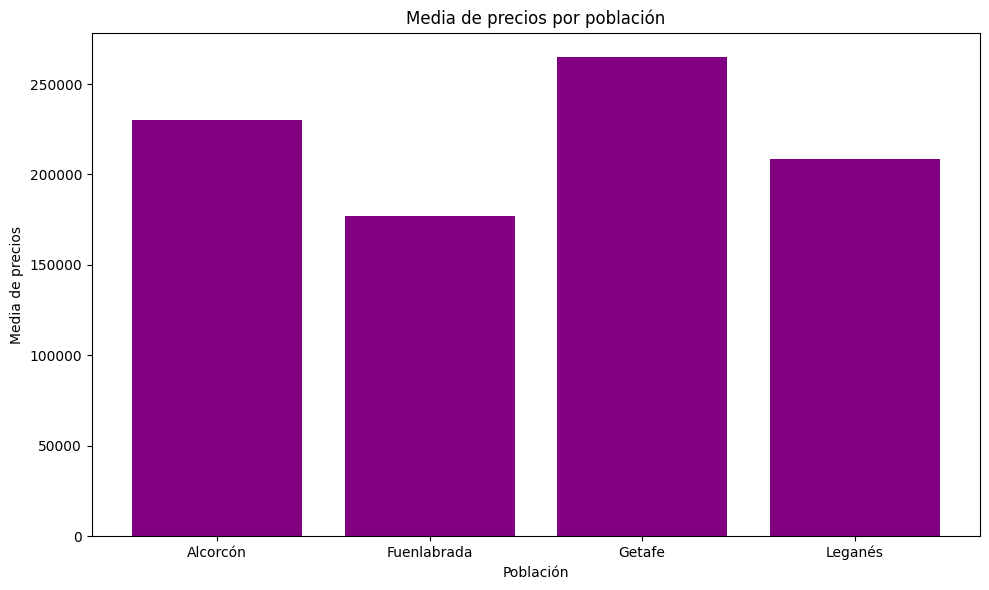

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


ds = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones = ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])
ds_sur = ds[poblaciones]

media_precios = ds_sur.groupby('level5')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(media_precios['level5'], media_precios['price'], color='purple')
plt.xlabel('Población')
plt.ylabel('Media de precios')
plt.title('Media de precios por población')
plt.tight_layout() 
plt.show()



**TODO: Markdown**. Para escribir aquí, has doble click en esta celda, elimina este contenido y coloca en su lugar el texto que quieres escribir. Luego, ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza dela muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Imprime ambos valores por  cada variable.

In [ ]:

media_precio = ds_sur['price'].mean()
media_habitaciones = ds_sur['rooms'].mean()
media_superficie = ds_sur['surface'].mean()
media_banos = ds_sur['bathrooms'].mean()

varianza_precio = ds_sur['price'].var()
varianza_habitaciones = ds_sur['rooms'].var()
varianza_superficie = ds_sur['surface'].var()
varianza_banos = ds_sur['bathrooms'].var()

print(f'Media de precio: {media_precio}')
print(f'Media de habitaciones: {media_habitaciones}')
print(f'Media de superficie: {media_superficie}')
print(f'Media de baños: {media_banos}')

print(f'Varianza de precio: {varianza_precio}')
print(f'Varianza de habitaciones: {varianza_habitaciones}')
print(f'Varianza de superficie: {varianza_superficie}')
print(f'Varianza de baños: {varianza_banos}')


Media de precio: 238960.7640949555
Media de habitaciones: 3.014903129657228
Media de superficie: 114.46610169491525
Media de baños: 1.6976047904191616
Varianza de precio: 17485347860.486614
Varianza de habitaciones: 0.8445536846319817
Varianza de superficie: 4905.821429599147
Varianza de baños: 0.6310587221359379


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [ ]:
ds = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones = ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])
ds_sur = ds[poblaciones]
indices_casas_mas_caras = ds_sur.groupby('level5')['price'].idxmax()

casas_mas_caras = ds_sur.loc[indices_casas_mas_caras]

print(casas_mas_caras)


       Unnamed: 0  id_realEstates  isNew  \
5585         5586       153275915  False   
11561       11562       153660921  False   
2881         2882       151105544  False   
10412       10413       152251506  False   

                               realEstate_name  phone_realEstate  \
5585                 100 home red inmobiliaria       912669623.0   
11561                              unna madrid       912780846.0   
2881                   unna grupo inmobiliario       912665694.0   
10412  bafre gestion y servicios inmobiliarios       910752245.0   

                                            url_inmueble  rooms  bathrooms  \
5585   https://www.fotocasa.es/es/comprar/vivienda/ca...    6.0        6.0   
11561  https://www.fotocasa.es/es/comprar/vivienda/va...    4.0        3.0   
2881   https://www.fotocasa.es/es/comprar/vivienda/ma...    6.0        4.0   
10412  https://www.fotocasa.es/es/comprar/vivienda/co...    6.0        5.0   

       surface    price  ... level4Id level5Id 

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

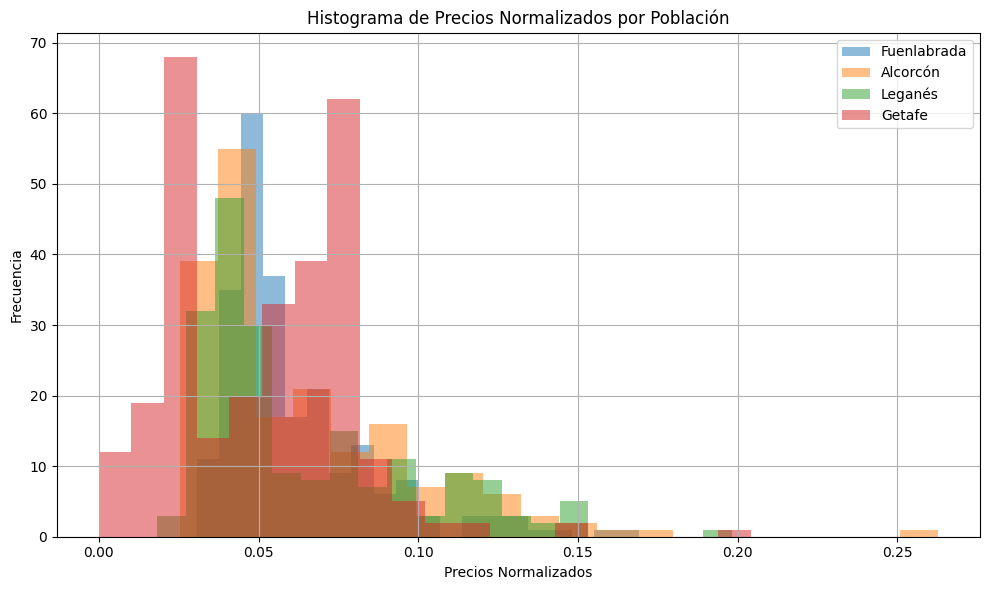

In [ ]:
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones = ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])
ds_sur = ds[poblaciones]

precios_norm = {}
for poblacion in ds_sur['level5'].unique():
    subset = ds_sur[ds_sur['level5'] == poblacion]
    precios = subset['price'].values.reshape(-1, 1)
    precios_norm[poblacion] = normalize(precios, axis=0).flatten()

plt.figure(figsize=(10, 6))
for poblacion, precios_norm in precios_norm.items():
    plt.hist(precios_norm, bins=20, alpha=0.5, label=poblacion)

plt.xlabel('Precios Normalizados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios Normalizados por Población')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

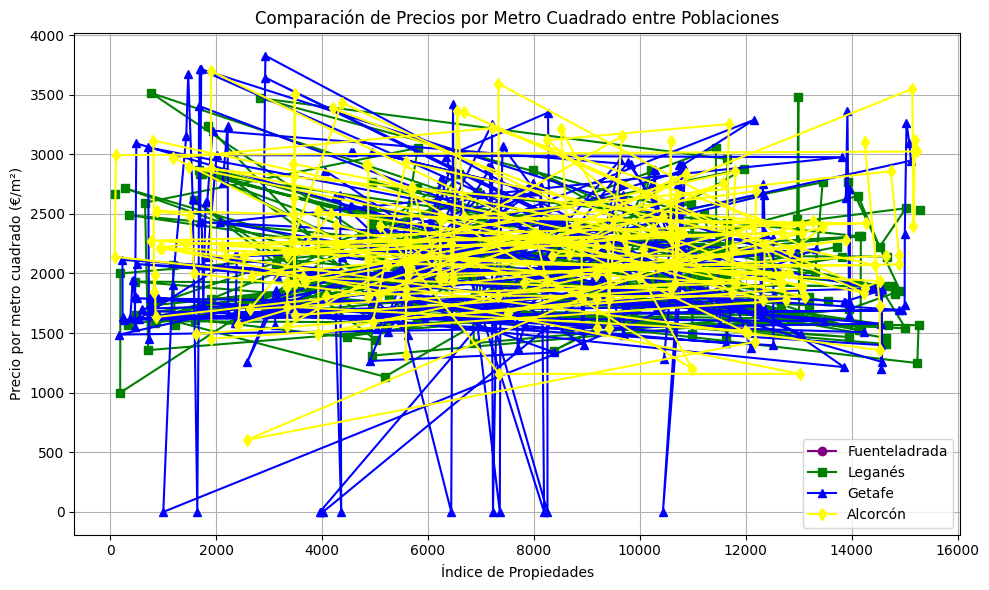

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones = ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])
ds_sur = ds[poblaciones].copy()

ds_sur['precio_por_m2'] = ds_sur['price'] / ds_sur['surface']
ds_sur_sorted = ds_sur.sort_values(by='level5')


fuenteladrada = ds_sur_sorted[ds_sur_sorted['level5'] == 'Fuenteladrada']
leganes = ds_sur_sorted[ds_sur_sorted['level5'] == 'Leganés']
getafe = ds_sur_sorted[ds_sur_sorted['level5'] == 'Getafe']
alcorcon = ds_sur_sorted[ds_sur_sorted['level5'] == 'Alcorcón']


plt.figure(figsize=(10, 6))
plt.plot(fuenteladrada['precio_por_m2'], label='Fuenteladrada', marker='o', color="Purple")
plt.plot(leganes['precio_por_m2'], label='Leganés', marker='s', color='Green')
plt.plot(getafe['precio_por_m2'], label='Getafe', marker='^', color='Blue')
plt.plot(alcorcon['precio_por_m2'], label='Alcorcón', marker='d', color='yellow')

plt.xlabel('Índice de Propiedades')
plt.ylabel('Precio por metro cuadrado (€/m²)')
plt.title('Comparación de Precios por Metro Cuadrado entre Poblaciones')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#I'll survive D:

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

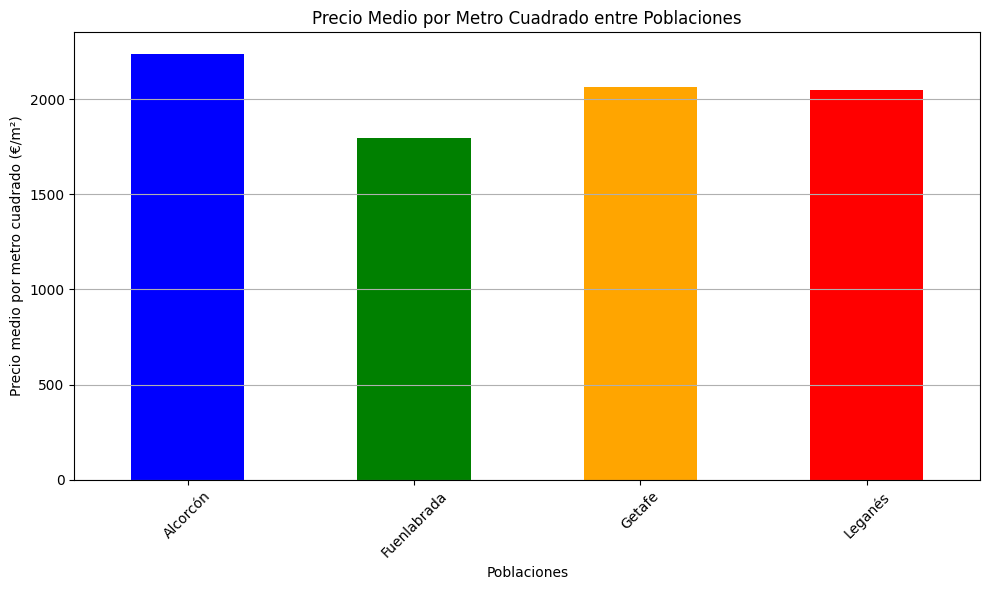

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones = ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])
ds_sur = ds[poblaciones].copy()


ds_sur['precio_por_m2'] = ds_sur['price'] / ds_sur['surface']
ds_sur_sorted = ds_sur.sort_values(by='level5')

precio_m2_medio = ds_sur_sorted.groupby('level5')['precio_por_m2'].mean()

plt.figure(figsize=(10, 6))
precio_m2_medio.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Poblaciones')
plt.ylabel('Precio medio por metro cuadrado (€/m²)')
plt.title('Precio Medio por Metro Cuadrado entre Poblaciones')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón ur de Madrid por color d cada población (debes usar el subconjunto obtenido en la pregunta 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar u código simple que transforme las columnas de coordenadas en un diccionario de python (agrega más información si es necesario) y agrégala al mapa.

In [1]:
from ipyleaflet import Map, Marker, AwesomeIcon, basemaps, basemap_to_tiles
import pandas as pd


# Mapa centrado en (60 grados latitud et -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (40.30, -3.79), zoom = 12, min_zoom = 1, max_zoom = 1000, 
    basemap=basemaps.OpenStreetMap.Mapnik)

#El mapa base del ejercicio se dio de baja en 2023, se buscado en la libreria el ipyleaflet

In [2]:
ds = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones = ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])
ds_sur = ds[poblaciones]

markers_dictionary = ds_sur[["latitude", "longitude", "level5"]].to_dict(orient='index')


for line, point in markers_dictionary.items():
    

    my_marker_color = 'blue'
    if (point["level5"] == "Fuenlabrada"):
        my_marker_color = "red"
    elif (point["level5"] == "Leganés"):
        my_marker_color = "green"
    elif (point["level5"] == "Getafe"):
        my_marker_color = "beige"
    

    marker_icon = AwesomeIcon(
        marker_color=my_marker_color,
    )

    map.add(Marker(
        location=(point["latitude"].replace(",", "."), point["longitude"].replace(",", ".")),
        icon=marker_icon
        )
    )

map


Map(center=[40.3, -3.79], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…